# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

In [ ]:
# 필요 라이브러리부터 설치합니다.
# %pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* business_type.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터
    * 택시운송업
    * 한식일반음식점업
    * 용달 화물자동차 운송업
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.4 business_type.csv

[데이터 소개]
* 서울시 업종 등록 데이터

#### [실습문제1] 데이터 로딩
* '1.4 business_type.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [1]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
seoul_business = pd.read_csv('1.4 business_type.csv')

In [2]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business.shape

(451, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.head()


,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220


In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           451 non-null    object
 1   동             451 non-null    object
 2   다수업종 상위10     451 non-null    object
 3   다수업종 상위10.1   451 non-null    object
 4   다수업종 상위10.2   451 non-null    object
 5   다수업종 상위10.3   451 non-null    object
 6   다수업종 상위10.4   451 non-null    object
 7   다수업종 상위10.5   451 non-null    object
 8   다수업종 상위10.6   451 non-null    object
 9   다수업종 상위10.7   451 non-null    object
 10  다수업종 상위10.8   451 non-null    object
 11  다수업종 상위10.9   451 non-null    object
 12  다수업종 상위10.10  451 non-null    object
 13  다수업종 상위10.11  451 non-null    object
 14  다수업종 상위10.12  451 non-null    object
 15  다수업종 상위10.13  451 non-null    object
 16  다수업종 상위10.14  451 non-null    object
 17  다수업종 상위10.15  451 non-null    object
 18  다수업종 상위10.16  451 non-null    object
 19  다수업종 상위1

#### [실습문제3] 데이터 확인 및 처리

* 데이터를 보았을때, 어느 데이터를 가져와야 할지 생각 해 봅시다.

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.head()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220


In [7]:
seoul_business.tail()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
446,강동구,성내3동,120,120,135,390,73,73,104,163,...,54,133,10,86,57,103,66,199,44,164
447,강동구,둔촌2동,117,436,63,249,89,89,61,108,...,34,85,10,788,21,39,35,90,24,101
448,강동구,암사1동,209,372,71,195,153,153,67,107,...,29,59,3,6,47,98,31,67,34,98
449,강동구,천호2동,157,187,152,509,144,151,97,188,...,63,212,4,17,95,268,24,42,69,245
450,강동구,길동,"1,441","1,557",152,436,217,225,146,237,...,71,228,6,126,122,294,39,136,70,224


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 1행에 있는 값으로 column명 지정하기 위해 값 추출
seoul_business[0:1].values

array([['자치구', '동', '택시운송업', '택시운송업', '한식 일반 음식점업', '한식 일반 음식점업',
        '용달 화물자동차 운송업', '용달 화물자동차 운송업', '부동산 중개 및 대리업', '부동산 중개 및 대리업',
        '두발미용업', '두발미용업', '커피전문점', '커피전문점', '남녀용 겉옷 및 셔츠 도매업',
        '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '기타주점업', '일반 교과 학원', '일반 교과 학원',
        '한식 육류요리 전문점', '한식 육류요리 전문점']], dtype=object)

In [9]:
# 각 column명에 사업체수, 종업자수 작성 및 column명으로 지정
seoul_business.columns = ['자치구', '동', '택시운송업 사업체수', '택시운송업 종업자수', '한식 일반 음식점업 사업체수', '한식 일반 음식점업 종업자수',
        '용달 화물자동차 운송업 사업체수', '용달 화물자동차 운송업 종업자수', '부동산 중개 및 대리업 사업체수', '부동산 중개 및 대리업 종업자수',
        '두발미용업 사업체수', '두발미용업 종업자수', '커피전문점 사업체수', '커피전문점 종업자수', '남녀용 겉옷 및 셔츠 도매업 사업체수',
        '남녀용 겉옷 및 셔츠 도매업 종업자수', '기타주점업 사업체수', '기타주점업 종업자수', '일반 교과 학원 사업체수', '일반 교과 학원 종업자수',
        '한식 육류요리 전문점 사업체수', '한식 육류요리 전문점 종업자수']

In [10]:
# 3번째 행 부터 데이터 사용
seoul_business = seoul_business[3:]

In [11]:
# 구별로 소계 삭제
seoul_business = seoul_business.loc[seoul_business['동'] != '소계']

In [12]:
# 동 단위는 해당 프로젝트에서 사용하지 않음으로 삭제 (구 단위로 진행)
seoul_business.drop('동', axis=1, inplace=True)

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.head()

,자치구,택시운송업 사업체수,택시운송업 종업자수,한식 일반 음식점업 사업체수,한식 일반 음식점업 종업자수,용달 화물자동차 운송업 사업체수,용달 화물자동차 운송업 종업자수,부동산 중개 및 대리업 사업체수,부동산 중개 및 대리업 종업자수,두발미용업 사업체수,...,커피전문점 사업체수,커피전문점 종업자수,남녀용 겉옷 및 셔츠 도매업 사업체수,남녀용 겉옷 및 셔츠 도매업 종업자수,기타주점업 사업체수,기타주점업 종업자수,일반 교과 학원 사업체수,일반 교과 학원 종업자수,한식 육류요리 전문점 사업체수,한식 육류요리 전문점 종업자수
4,종로구,7,7,230,982,12,12,57,96,28,...,124,525,2,18,74,177,9,34,45,220
5,종로구,5,5,42,145,4,4,9,10,-,...,66,243,2,3,3,8,-,-,7,33
6,종로구,22,22,26,100,9,9,17,26,8,...,24,62,3,6,7,23,16,59,3,15
7,종로구,10,10,31,116,11,11,33,52,19,...,19,62,2,4,26,54,25,71,10,103
8,종로구,10,10,10,26,410,416,12,17,9,...,7,15,-,-,-,-,14,50,1,2


In [14]:
# 자치구 컬럼 제외 나머지 object에서 숫자형 data type으로 변경
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 4 to 450
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   자치구                   423 non-null    object
 1   택시운송업 사업체수            423 non-null    object
 2   택시운송업 종업자수            423 non-null    object
 3   한식 일반 음식점업 사업체수       423 non-null    object
 4   한식 일반 음식점업 종업자수       423 non-null    object
 5   용달 화물자동차 운송업 사업체수     423 non-null    object
 6   용달 화물자동차 운송업 종업자수     423 non-null    object
 7   부동산 중개 및 대리업 사업체수     423 non-null    object
 8   부동산 중개 및 대리업 종업자수     423 non-null    object
 9   두발미용업 사업체수            423 non-null    object
 10  두발미용업 종업자수            423 non-null    object
 11  커피전문점 사업체수            423 non-null    object
 12  커피전문점 종업자수            423 non-null    object
 13  남녀용 겉옷 및 셔츠 도매업 사업체수  423 non-null    object
 14  남녀용 겉옷 및 셔츠 도매업 종업자수  423 non-null    object
 15  기타주점업 사업체수            423 non-null    ob

In [15]:
# '-' 값 존재
seoul_business['택시운송업 사업체수'].unique()

array(['7', '5', '22', '10', '14', '9', '1', '6', '4', '13', '16', '37',
       '2', '11', '15', '24', '33', '53', '38', '20', '46', '35', '31',
       '27', '30', '8', '21', '44', '438', '51', '43', '61', '70', '71',
       '36', '58', '45', '62', '39', '59', '72', '79', '99', '157', '34',
       '47', '126', '105', '76', '69', '18', '42', '123', '67', '101',
       '91', '286', '145', '202', '198', '60', '95', '167', '154', '68',
       '109', '85', '136', '159', '181', '115', '388', '200', '153',
       '183', '1,253', '54', '206', '87', '132', '144', '83', '40', '74',
       '119', '98', '108', '310', '97', '112', '81', '116', '80', '149',
       '122', '135', '220', '141', '113', '218', '176', '241', '177',
       '173', '128', '802', '163', '238', '124', '291', '207', '279',
       '1,366', '93', '165', '172', '284', '110', '171', '102', '221',
       '107', '187', '1,008', '120', '50', '131', '272', '90', '127',
       '856', '17', '28', '358', '65', '89', '75', '158', '186', '2

In [19]:
# 값에 '-' 존재 => 제거
# 분명 제거 했는데, 데이터의 개수가 왜 그대로인지는 모르겠음. 확인해봐야함. (해당 코드 진행 후, datatype 변경은 잘 됨)
seoul_business.replace('-', None, inplace=True)
seoul_business.dropna(inplace=True)
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 4 to 450
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   자치구                   423 non-null    object
 1   택시운송업 사업체수            423 non-null    object
 2   택시운송업 종업자수            423 non-null    object
 3   한식 일반 음식점업 사업체수       423 non-null    object
 4   한식 일반 음식점업 종업자수       423 non-null    object
 5   용달 화물자동차 운송업 사업체수     423 non-null    object
 6   용달 화물자동차 운송업 종업자수     423 non-null    object
 7   부동산 중개 및 대리업 사업체수     423 non-null    object
 8   부동산 중개 및 대리업 종업자수     423 non-null    object
 9   두발미용업 사업체수            423 non-null    object
 10  두발미용업 종업자수            423 non-null    object
 11  커피전문점 사업체수            423 non-null    object
 12  커피전문점 종업자수            423 non-null    object
 13  남녀용 겉옷 및 셔츠 도매업 사업체수  423 non-null    object
 14  남녀용 겉옷 및 셔츠 도매업 종업자수  423 non-null    object
 15  기타주점업 사업체수            423 non-null    ob

In [21]:
# 해당 데이터프레임을 'df_seoul_business.csv' 파일로 저장하세요.
seoul_business.to_csv('df_seoul_business.csv', index=False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business

,자치구,택시운송업 사업체수,택시운송업 종업자수,한식 일반 음식점업 사업체수,한식 일반 음식점업 종업자수,용달 화물자동차 운송업 사업체수,용달 화물자동차 운송업 종업자수,부동산 중개 및 대리업 사업체수,부동산 중개 및 대리업 종업자수,두발미용업 사업체수,...,커피전문점 사업체수,커피전문점 종업자수,남녀용 겉옷 및 셔츠 도매업 사업체수,남녀용 겉옷 및 셔츠 도매업 종업자수,기타주점업 사업체수,기타주점업 종업자수,일반 교과 학원 사업체수,일반 교과 학원 종업자수,한식 육류요리 전문점 사업체수,한식 육류요리 전문점 종업자수
4,종로구,7,7,230,982,12,12,57,96,28,...,124,525,2,18,74,177,9,34,45,220
5,종로구,5,5,42,145,4,4,9,10,28,...,66,243,2,3,3,8,9,34,7,33
6,종로구,22,22,26,100,9,9,17,26,8,...,24,62,3,6,7,23,16,59,3,15
7,종로구,10,10,31,116,11,11,33,52,19,...,19,62,2,4,26,54,25,71,10,103
8,종로구,10,10,10,26,410,416,12,17,9,...,7,15,2,4,26,54,14,50,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,강동구,120,120,135,390,73,73,104,163,83,...,54,133,10,86,57,103,66,199,44,164
447,강동구,117,436,63,249,89,89,61,108,62,...,34,85,10,788,21,39,35,90,24,101
448,강동구,209,372,71,195,153,153,67,107,82,...,29,59,3,6,47,98,31,67,34,98
449,강동구,157,187,152,509,144,151,97,188,83,...,63,212,4,17,95,268,24,42,69,245


In [24]:
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 4 to 450
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   자치구                   423 non-null    object
 1   택시운송업 사업체수            423 non-null    object
 2   택시운송업 종업자수            423 non-null    object
 3   한식 일반 음식점업 사업체수       423 non-null    object
 4   한식 일반 음식점업 종업자수       423 non-null    object
 5   용달 화물자동차 운송업 사업체수     423 non-null    object
 6   용달 화물자동차 운송업 종업자수     423 non-null    object
 7   부동산 중개 및 대리업 사업체수     423 non-null    object
 8   부동산 중개 및 대리업 종업자수     423 non-null    object
 9   두발미용업 사업체수            423 non-null    object
 10  두발미용업 종업자수            423 non-null    object
 11  커피전문점 사업체수            423 non-null    object
 12  커피전문점 종업자수            423 non-null    object
 13  남녀용 겉옷 및 셔츠 도매업 사업체수  423 non-null    object
 14  남녀용 겉옷 및 셔츠 도매업 종업자수  423 non-null    object
 15  기타주점업 사업체수            423 non-null    ob

In [25]:
seoul_business.head(10)

,자치구,택시운송업 사업체수,택시운송업 종업자수,한식 일반 음식점업 사업체수,한식 일반 음식점업 종업자수,용달 화물자동차 운송업 사업체수,용달 화물자동차 운송업 종업자수,부동산 중개 및 대리업 사업체수,부동산 중개 및 대리업 종업자수,두발미용업 사업체수,...,커피전문점 사업체수,커피전문점 종업자수,남녀용 겉옷 및 셔츠 도매업 사업체수,남녀용 겉옷 및 셔츠 도매업 종업자수,기타주점업 사업체수,기타주점업 종업자수,일반 교과 학원 사업체수,일반 교과 학원 종업자수,한식 육류요리 전문점 사업체수,한식 육류요리 전문점 종업자수
4,종로구,7,7,230,982,12,12,57,96,28,...,124,525,2,18,74,177,9,34,45,220
5,종로구,5,5,42,145,4,4,9,10,28,...,66,243,2,3,3,8,9,34,7,33
6,종로구,22,22,26,100,9,9,17,26,8,...,24,62,3,6,7,23,16,59,3,15
7,종로구,10,10,31,116,11,11,33,52,19,...,19,62,2,4,26,54,25,71,10,103
8,종로구,10,10,10,26,410,416,12,17,9,...,7,15,2,4,26,54,14,50,1,2
9,종로구,14,14,14,44,7,7,26,37,11,...,13,55,2,4,1,1,5,22,3,15
10,종로구,9,9,57,270,7,7,16,23,8,...,46,133,2,2,5,9,3,10,6,21
11,종로구,1,1,565,"2,396",3,11,111,271,37,...,284,"1,360",210,376,237,674,8,50,192,996
12,종로구,6,6,176,542,11,25,71,84,17,...,72,197,71,192,36,74,8,50,51,204
13,종로구,4,4,71,395,17,17,13,13,8,...,69,338,9,127,27,108,2,14,11,45


In [27]:
for col in list(seoul_business)[1:]:
    print(col)
    seoul_business[col] = seoul_business[col].str.replace(',', '').astype('int')

택시운송업 사업체수
택시운송업 종업자수
한식 일반 음식점업 사업체수
한식 일반 음식점업 종업자수
용달 화물자동차 운송업 사업체수
용달 화물자동차 운송업 종업자수
부동산 중개 및 대리업 사업체수
부동산 중개 및 대리업 종업자수
두발미용업 사업체수
두발미용업 종업자수
커피전문점 사업체수
커피전문점 종업자수
남녀용 겉옷 및 셔츠 도매업 사업체수
남녀용 겉옷 및 셔츠 도매업 종업자수
기타주점업 사업체수
기타주점업 종업자수
일반 교과 학원 사업체수
일반 교과 학원 종업자수
한식 육류요리 전문점 사업체수
한식 육류요리 전문점 종업자수


In [28]:
temp = seoul_business.drop('자치구', axis=1).astype('int')

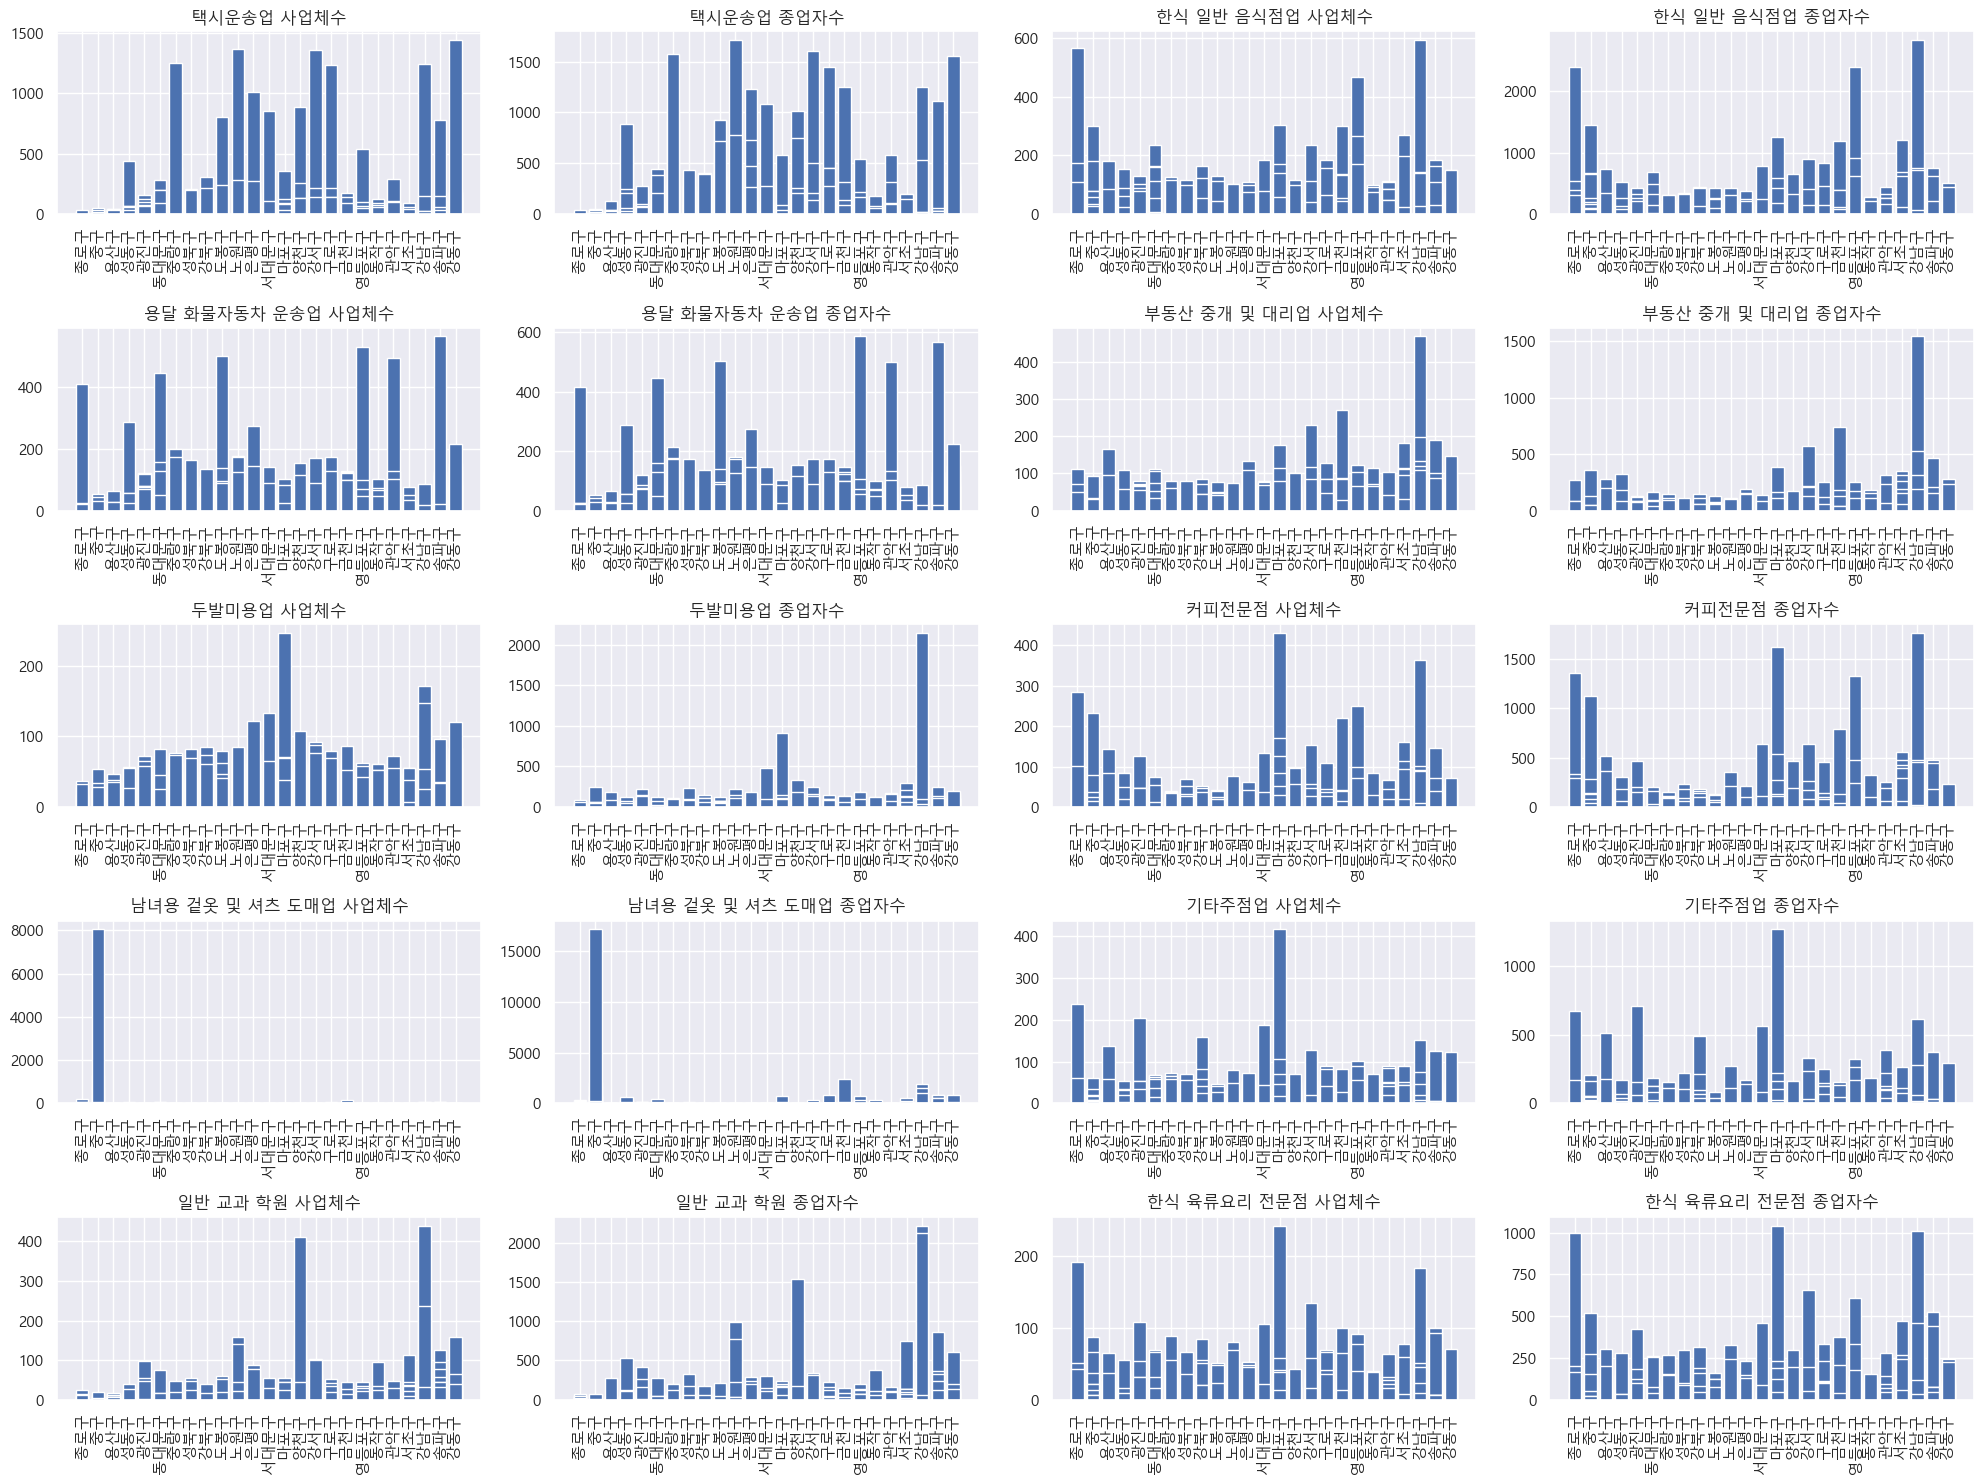

In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

plt.figure(figsize=(20, 15))
for i in range(1, len(list(seoul_business))):
    plt.subplot(5, 4, i)
    plt.title(list(seoul_business)[i])
    plt.bar(seoul_business['자치구'], temp[list(seoul_business)[i]])
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

In [30]:
temp.describe()

,택시운송업 사업체수,택시운송업 종업자수,한식 일반 음식점업 사업체수,한식 일반 음식점업 종업자수,용달 화물자동차 운송업 사업체수,용달 화물자동차 운송업 종업자수,부동산 중개 및 대리업 사업체수,부동산 중개 및 대리업 종업자수,두발미용업 사업체수,두발미용업 종업자수,커피전문점 사업체수,커피전문점 종업자수,남녀용 겉옷 및 셔츠 도매업 사업체수,남녀용 겉옷 및 셔츠 도매업 종업자수,기타주점업 사업체수,기타주점업 종업자수,일반 교과 학원 사업체수,일반 교과 학원 종업자수,한식 육류요리 전문점 사업체수,한식 육류요리 전문점 종업자수
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,111.531915,181.330969,69.089835,236.839243,67.498818,69.536643,56.768322,100.794326,42.808511,85.768322,38.427896,135.513002,32.598109,131.404255,32.111111,75.803783,28.352246,120.501182,26.697400,107.936170
std,182.561314,264.567087,64.323873,288.242744,66.202435,67.655967,39.996306,115.321343,25.315614,134.542328,43.663392,192.627785,398.601720,866.367593,35.662377,109.319683,39.493251,224.687312,26.042222,130.675381
min,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,9.000000,10.000000,5.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,35.000000,31.000000,85.000000,29.000000,31.000000,32.000000,47.000000,26.000000,39.000000,15.000000,38.000000,1.000000,3.000000,11.000000,20.000000,10.000000,30.000000,11.000000,36.000000
50%,71.000000,87.000000,53.000000,156.000000,56.000000,59.000000,47.000000,73.000000,39.000000,64.000000,26.000000,77.000000,3.000000,11.000000,22.000000,44.000000,19.000000,60.000000,19.000000,68.000000
75%,123.500000,212.000000,85.000000,275.000000,83.000000,86.000000,70.500000,114.000000,55.000000,94.000000,45.000000,155.500000,6.500000,47.000000,42.500000,89.000000,33.000000,121.000000,34.000000,133.000000
max,1441.000000,1712.000000,593.000000,2827.000000,565.000000,585.000000,469.000000,1541.000000,247.000000,2147.000000,431.000000,1764.000000,8054.000000,17119.000000,416.000000,1264.000000,440.000000,2215.000000,242.000000,1042.000000


In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---